# Image processing Task

## Task 1 - NumPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams['figure.figsize'] = [10, 3]

In [5]:
img = np.zeros((300,300), dtype=np.uint8)
print(img)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


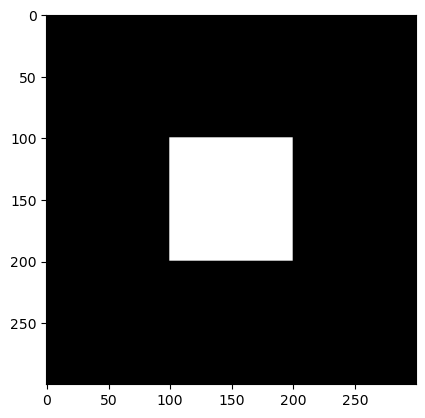

In [6]:
img[100:200, 100:200] = 255
plt.imshow(img, cmap='gray')
plt.show()

## Task 2 - Image concatenation

In [2]:
image1 = cv2.imread('./task-assets/concat1.jpg',0)
image2 = cv2.imread('./task-assets/concat2.jpg',0)
image3 = cv2.imread('./task-assets/concat3.jpg',0)


[[189 189 189 ... 195 195 195]
 [189 189 189 ... 195 195 195]
 [189 189 189 ... 195 195 195]
 ...
 [115 115 115 ... 121 121 121]
 [114 114 114 ... 120 120 120]
 [114 114 114 ... 119 119 119]]


In [3]:
cv2.imshow('image1', image1)
cv2.imshow('image2', image2)
cv2.imshow('image3', image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 3 - Thresholding

In [11]:
img1 = cv2.imread('./task-assets/threshold.jpg',0)
thresh = np.copy(img1)

In [7]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()    

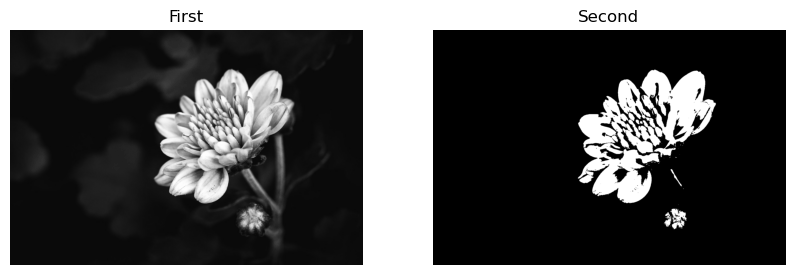

In [14]:
thresh[thresh>180] = 255
thresh[thresh<180] = 0
displayImages(img1, thresh)

## Task 4 - Feature Matching

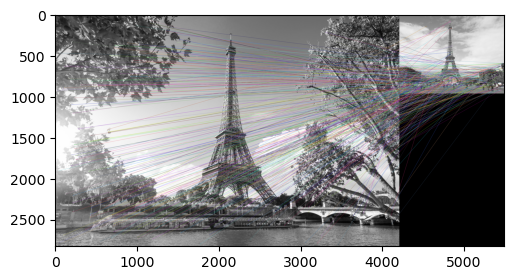

(<matplotlib.image.AxesImage at 0x14a989e5d90>, None)

In [18]:
img1 = cv2.imread('./task-assets/feature1.jpeg',cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('./task-assets/feature2.jpeg',cv2.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## 

## Final Task - Drawing a bounding box

In [23]:
import cv2

point1 = None
point2 = None

def draw_rectangle(event, x, y, flags, param):
    global point1, point2
    if event == cv2.EVENT_LBUTTONDOWN:
        if point1 is None:
            point1 = (x, y)
            print(f"Point 1: {point1}")
            
        elif point2 is None:
            point2 = (x, y)
            print(f"Point 2: {point2}")

# Creating a window and setting the mouse callback
towers = cv2.imread('./task-assets/skyline.jpg',0)
cv2.namedWindow('Tower')
cv2.setMouseCallback('Tower', draw_rectangle)

while True:
    image_copy = towers.copy()
    
    # Draw the rectangle if both points are selected
    if point1 is not None and point2 is not None:
        cv2.rectangle(image_copy, point1, point2, (0, 0, 255), 2)
    
    cv2.imshow('Tower', image_copy)
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()


KeyboardInterrupt: 